In [8]:
import pandas as pd
import numpy as np
import arimafd as oa
import matplotlib.pyplot as plt

In [1]:


my_array = np.random.normal(size=1000) # init array
my_array[-3] = 1000 # init anomaly
ts = pd.DataFrame(my_array,
                  index=pd.date_range(start='01-01-2000',
                                      periods=1000,
                                      freq='H'))
ad = oa.Anomaly_detection(ts) #init anomaly detection algorithm
ad.generate_tensor(ar_order=3) #it compute weights of ARIMA on history 
ts_anomaly = ad.proc_tensor() #processing of weights. 
ts_anomaly

C:\Python310\lib\site-packages\arimafd\tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
C:\Python310\lib\site-packages\arimafd\tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)


Time seconds: 29.855043172836304


2000-01-01 03:00:00    0
2000-01-01 04:00:00    0
2000-01-01 05:00:00    0
2000-01-01 06:00:00    0
2000-01-01 07:00:00    0
                      ..
2000-02-11 11:00:00    0
2000-02-11 12:00:00    0
2000-02-11 13:00:00    0
2000-02-11 14:00:00    1
2000-02-11 15:00:00    1
Freq: H, Length: 997, dtype: int32

In [24]:
my_df = np.array([np.random.normal(size=1000), np.random.normal(size=1000)])
# my_df[1, -3] = 1000 # init anomaly
my_df[0, -3] = 1000 # init anomaly
my_df = my_df.T

In [25]:

ts = pd.DataFrame(my_df,
                  index=pd.date_range(start='01-01-2000',
                                      periods=1000,
                                      freq='H'))
ad = oa.Anomaly_detection(ts) #init anomaly detection algorithm
ad.generate_tensor(ar_order=3) #it compute weights of ARIMA on history 
ts_anomaly = ad.proc_tensor() #processing of weights. 
ts_anomaly

C:\Python310\lib\site-packages\arimafd\tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
C:\Python310\lib\site-packages\arimafd\tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)


Time seconds: 29.434051990509033
Projection


TypeError: Cannot convert complex to float

In [32]:
df = pd.DataFrame(my_df)
df.head()

,0,1
0,-1.893615,0.556553
1,0.213294,-1.335482
2,0.001205,0.486036
3,-0.817089,-1.547304
4,0.659246,1.082691


In [35]:

values = df[0]


y = pd.Series(ts_anomaly.values)
anomalies_indecies = y.index[y == 1]
anomalies_indecies, values[anomalies_indecies]


(Int64Index([995, 996], dtype='int64'),
 995   -0.155259
 996   -1.907808
 Name: 0, dtype: float64)

Text(0.5, 1.0, 'Temperature Predicted')

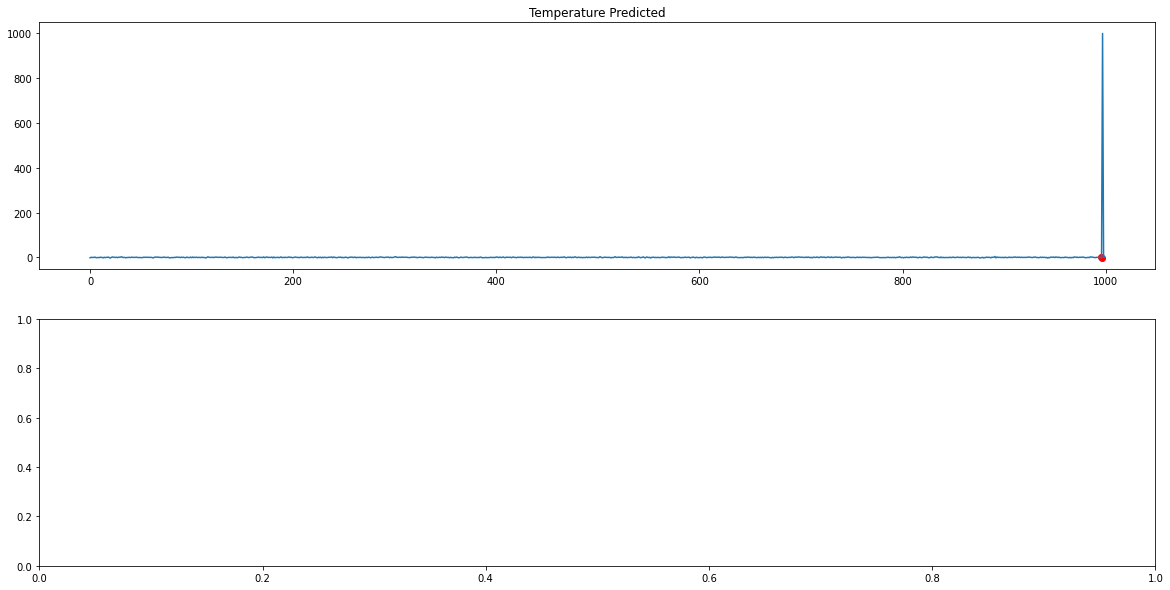

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(20,10))
axs[0].plot(values)
axs[0].scatter(df.index[anomalies_indecies], values[anomalies_indecies], color='r')
# #axs.scatter(cpi, temperatures[cpi], color='g', marker='^', s=300)
axs[0].set_title("Temperature Predicted")

In [31]:
df.tail()

,0,1
995,-0.155259,0.360648
996,-1.907808,-0.863494
997,1000.000000,-0.031203
998,-0.413606,0.018017
999,1.887688,0.472630
